In [7]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# import data
dataset = pd.read_excel(r"YT_UScomments.xlsx")

In [9]:
dataset.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691407 entries, 0 to 691406
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691407 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691407 non-null  object
 3   replies       691407 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [11]:
# lets find out missing values in your data
dataset.isnull().sum()

video_id         0
comment_text    33
likes            0
replies          0
dtype: int64

In [12]:
# drop missing values as we have very few & lets update dataframe as well..
dataset.dropna(inplace=True)

In [13]:
dataset.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

# Perform Sentiment Analysis on the comments database

We will perform sentiment analysis using TextBlob which is a NLP library built on top of NLTK

In [14]:
!pip install textblob


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [15]:
# import textblob
from textblob import TextBlob as tb

In [16]:
# let's do the same for all other rows

polarity = []

for comment in dataset['comment_text']:
    try:
        polarity.append(tb(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [17]:
dataset["polarity"] = polarity


In [18]:
dataset.head()

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


# Performing Exploring Data Analysis (EDA) on the data

Let's use Wordcloud to visual see which are the most used words for high positive polarity (=1) and high negative polarity (=-1)

In [19]:
!pip install wordcloud


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [20]:
from wordcloud import WordCloud , STOPWORDS

In [21]:
# high positive polarity
comments_positive = dataset[dataset['polarity']==1]
comments_positive.head(3)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0


In [22]:
# high negative polarity
comments_negative = dataset[dataset['polarity']==-1]
comments_negative.head(3)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0


In [23]:
# understant which type is our column containing comments
type(comments_positive['comment_text'])

pandas.core.series.Series

In [24]:
# in order to use wordcloud, we can't use a Series, we need that feature as a string
string_comments_positive = ' '.join(comments_positive['comment_text'])
string_comments_negative = ' '.join(comments_negative['comment_text'])

In [25]:
stopwords = set(STOPWORDS)

In [26]:
wordcloud_positives = WordCloud(stopwords=set(STOPWORDS)).generate(string_comments_positive)
wordcloud_negatives = WordCloud(stopwords=set(STOPWORDS)).generate(string_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

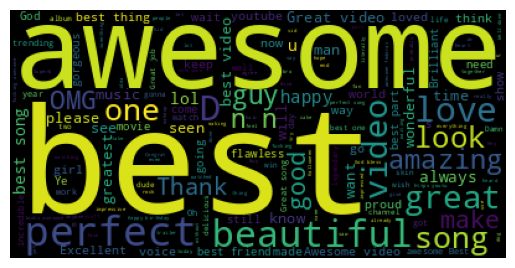

In [27]:
# high positive comments wordcloud
plt.imshow(wordcloud_positives)
plt.axis('off')

In [28]:
list(wordcloud_positives.words_)[0:3]

['best', 'awesome', 'perfect']

As we can see from the wordcloud above, the top 3 most used words are:<br>
- Best
- Awesome
- Perfect

(-0.5, 399.5, 199.5, -0.5)

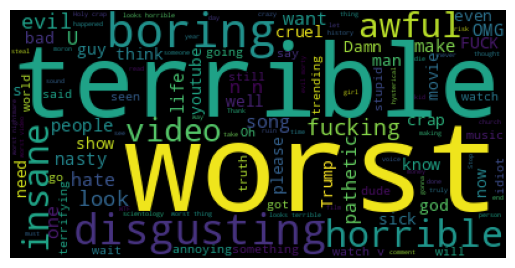

In [29]:
# high negative comments wordcloud
plt.imshow(wordcloud_negatives)
plt.axis('off')

In [30]:
list(wordcloud_negatives.words_)[0:3]

['worst', 'terrible', 'boring']

As we can see from the wordcloud above, the top 3 most used words are:<br>
- Worst
- Terrible
- Boring

# Emojis' Analysis

Emojis are very used when commenting something nowaday.<br>
Makes sense to consider making an analysis regarding emojis when doing a sentiment analysis on Youtube comments.

In [31]:
!pip install emoji==2.2.0


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [32]:
import emoji

In [33]:
# extracting one emoji from comment
emoji_comment = dataset['comment_text'][4]
emoji_comment

'trending 😉'

In [34]:
[char for char in emoji_comment if char in emoji.EMOJI_DATA]

['😉']

In [35]:
# Extracting all emojis from dataset
all_emojis_list = []

for comment in dataset['comment_text']:
    for char in str(comment):
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)
            
all_emojis_list[:5]

['‼', '‼', '‼', '😉', '😭']

Now that we have all emojis extracted, let's see which one is used the most

In [36]:
from collections import Counter

In [37]:
emoji_counter = Counter(all_emojis_list).most_common(10)
emoji_counter

[('😂', 36998),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5721),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5362),
 ('💕', 5147)]

In [38]:
emojis = [emoji_counter[i][0] for i in range(len(emoji_counter))]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [39]:
freqs = [emoji_counter[i][1] for i in range(len(emoji_counter))]
freqs

[36998, 33453, 31119, 8694, 8398, 5721, 5545, 5476, 5362, 5147]

In [40]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [42]:
bar_plot = go.Bar(x=emojis , y=freqs)
iplot([bar_plot])

As can be seen from the bar chart above, most of comments containing emojis use positive emojis - funny, love, heart, etc.